# IBM analytics employee attrition and performance

## Predict attrition of the employees 

#### in this kernel I will try to predict whether the person is Attrition or not Attrition

### Import all the necessary libraries

In [55]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# allow plots to appear within the notebook
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree


import warnings
warnings.filterwarnings("ignore")

## import the data

In [56]:
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

### View the first fields in the table

In [57]:
data.head(7)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0


### searching for null data

In [58]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

We have not received any field that is null so we do not have to delete anything

## The describe of the data

### the Target:

In [59]:
data.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

we can see that the 'No' group is much bigger then the 'Yes' group

In [60]:
num_cols = data._get_numeric_data().columns
data[num_cols].describe() 

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


- EmployeeCount, EmployeeNumber and StandardHours don't make sense
  and They are not important for our prediction So I decided to delete them.
- we can also delete 'Over18' because all of the people are over 18

In [61]:
data.drop(['EmployeeCount', 'EmployeeNumber','StandardHours','Over18'], axis=1, inplace=True)

## analyze the numeric features

In the Code section I have created eight graphs that show the distribution of the numeric features

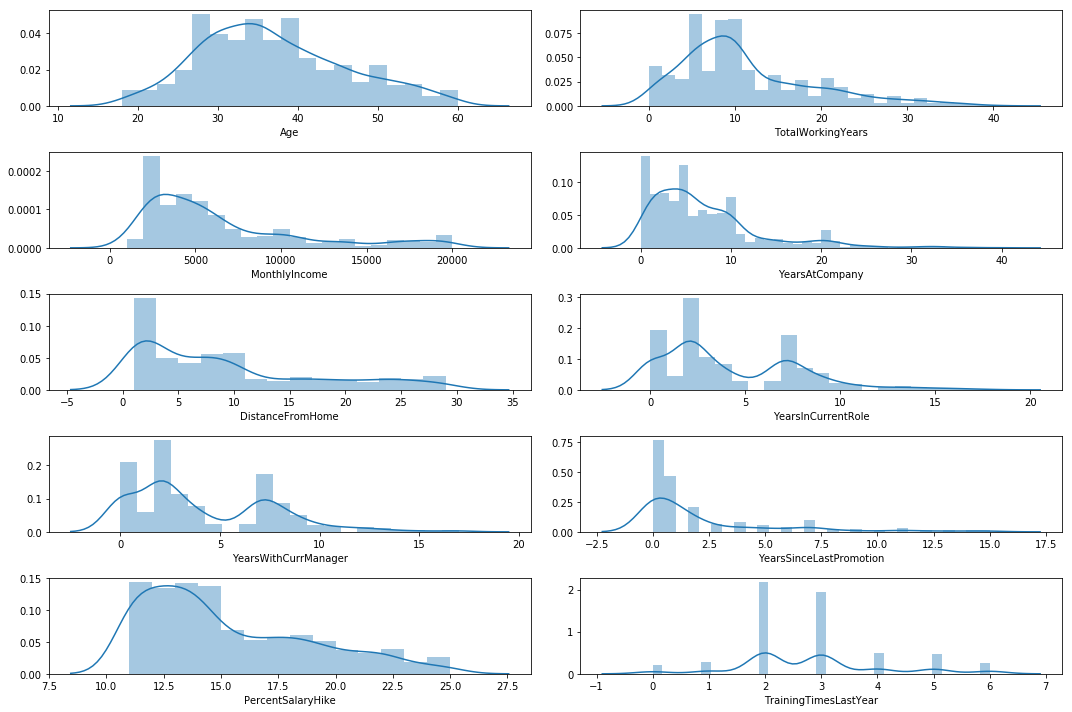

In [71]:
fig,ax = plt.subplots(5,2, figsize=(15,10))
sns.distplot(data['Age'], ax = ax[0,0])
sns.distplot(data['TotalWorkingYears'], ax = ax[0,1]) 
sns.distplot(data['MonthlyIncome'], ax = ax[1,0]) 
sns.distplot(data['YearsAtCompany'], ax = ax[1,1]) 
sns.distplot(data['DistanceFromHome'], ax = ax[2,0]) 
sns.distplot(data['YearsInCurrentRole'], ax = ax[2,1]) 
sns.distplot(data['YearsWithCurrManager'], ax = ax[3,0]) 
sns.distplot(data['YearsSinceLastPromotion'], ax = ax[3,1]) 
sns.distplot(data['PercentSalaryHike'], ax = ax[4,0]) 
sns.distplot(data['TrainingTimesLastYear'], ax = ax[4,1]) 
plt.tight_layout()
plt.show()


### Conclusions from the graphs above:

* most of the people in the company are aged 28-40
* most people work between 5 to 12 years in the company
* most people with an income of 2500 to 5200 dollars
* most people live within 0.2 to 11 km of their place of work
* most people have been in the same job and hava the same manger 1,3,7 years
* most people have not been promoted 1.5 year
* most of the percent salary hike of people is between 11-15%
* most people hava train 2-3 times in the last year

### I can guess that:

* the older you are, the more likely you to be 'Attrition'
* the more years you are working in the same place, the more likely you to be 'Attrition'
* the lower salary you get, the more likely you to be 'Attrition'
* the greater the distance from your workplace, the more likely you to be 'Attrition'
* the longer you are in the same job, the more likely you to be 'Attrition' 
* the longer time you didnt hava any promotion, the more likely you to be 'Attrition'
* the lowest time you didnt hava any training, the more likely you to be 'Attrition'

I dont think that how much you hava the same manager, and the percent salary hike effecting here

## analyze the categorical features

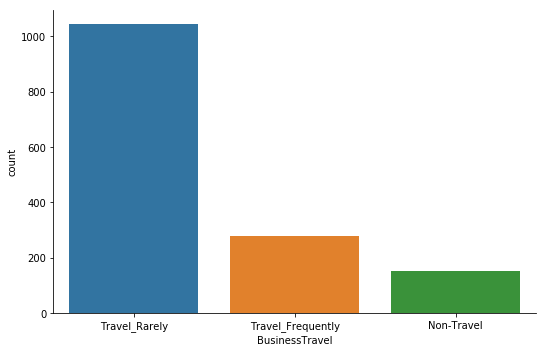

In [63]:
sns.factorplot(data=data,kind='count',size=5,aspect=1.5,x='BusinessTravel') #, ax=ax[0,0])

The above plot clearly shows that most of the people belong to the 'Travel_Rarely' class. This indicates that most of the people did not have a job which asked them for frequent travelling.

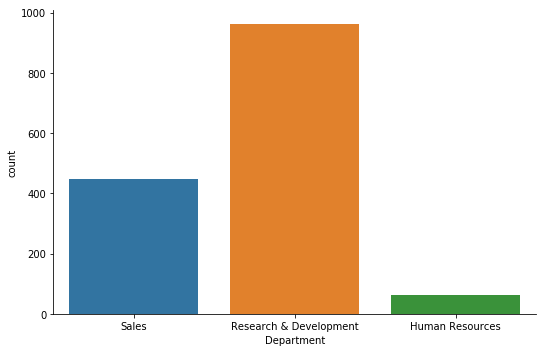

In [64]:
sns.factorplot(data=data,kind='count',size=5,aspect=1.5,x='Department')#, ax=ax[3,0])

The above plot clearly shows that most of the people belong to the 'Research & Development' class. This indicates that the company invests most of its people in this department and most of it are not Atrrition

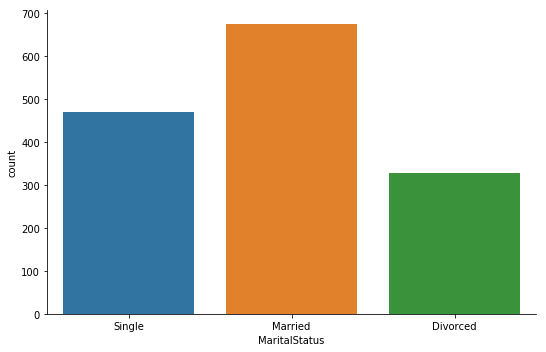

In [65]:
sns.factorplot(data=data,kind='count',size=5,aspect=1.5,x='MaritalStatus')#, ax=ax[2,0])

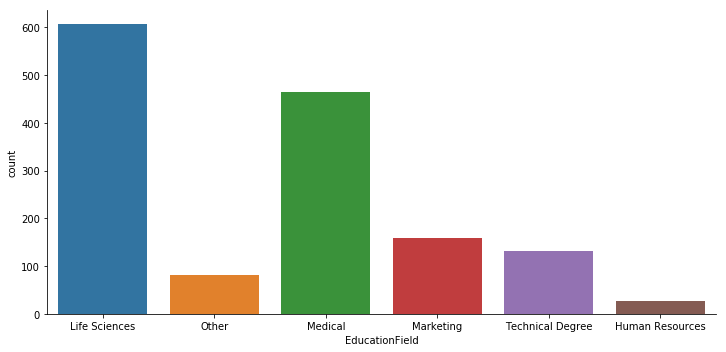

In [66]:
sns.factorplot(data=data,kind='count',size=5,aspect=2,x='EducationField')#, ax=ax[4,0])

The above plot clearly shows that most of the people Education is 'life scienes' or 'medical'

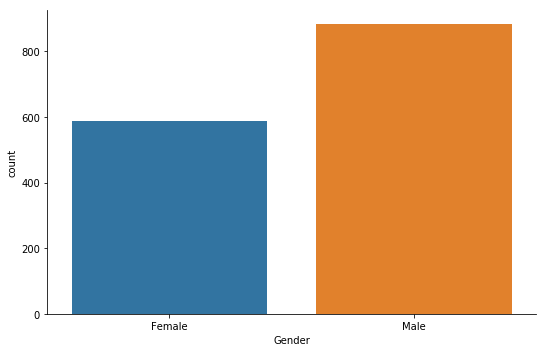

In [67]:
sns.factorplot(data=data,kind='count',size=5,aspect=1.5,x='Gender')#, ax=ax[5,0])

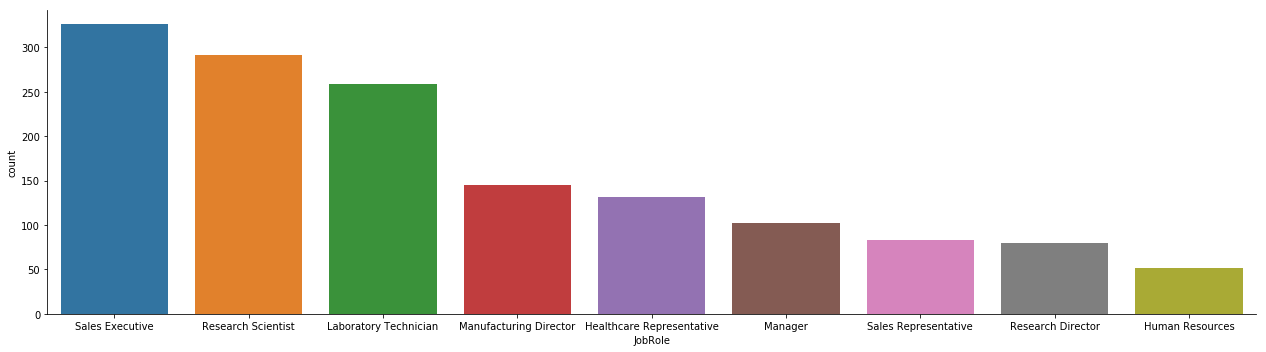

In [68]:
sns.factorplot(data=data,kind='count',size=5,aspect=3.5,x='JobRole')#, ax=ax[6,0])

the same to this feature: ['Education','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','WorkLifeBalance','RelationshipSatisfaction','PerformanceRating']


## Now we will see how the features affect the Attrition

In [72]:
data.groupby('Attrition')[data.columns].mean()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,
No,37.561233,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,6832.739659,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
Yes,33.607595,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,4787.092827,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321


- now we can see a proof/refutations to the speculation I had before
- the features that are not effecting the Atrrition will later dropped

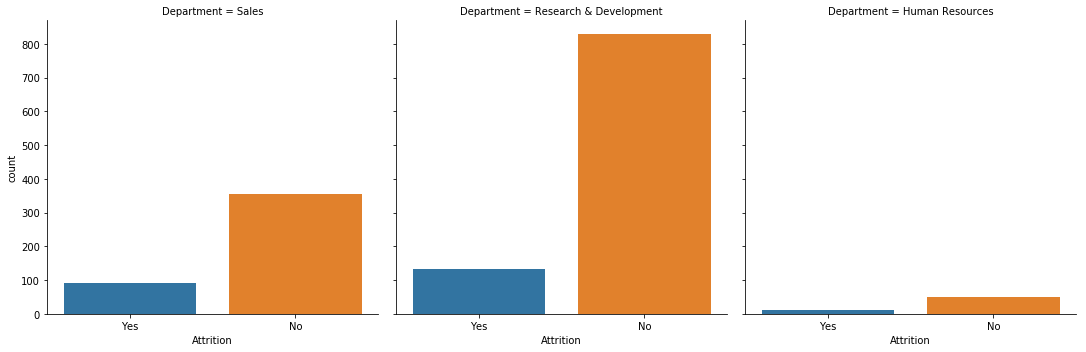

In [73]:
sns.factorplot(data=data,kind='count',x='Attrition',col='Department')

In [74]:
pd.crosstab(columns=data.Attrition,index=data.Department,margins=True,normalize='index')

Attrition,No,Yes
Department,,
Human Resources,0.809524,0.190476
Research & Development,0.861602,0.138398
Sales,0.793722,0.206278
All,0.838776,0.161224


we can see that the most of the observations corresspond to 'No' as we saw before also. About 81 % of the people in 'Human Resources' dont want to leave the organisation and only 19 % want to leave. Similar conclusions can be drawn for other departments.

In [75]:
pd.crosstab(columns=data.Attrition,index=data.Gender,margins=True,normalize='index')

Attrition,No,Yes
Gender,,
Female,0.852041,0.147959
Male,0.829932,0.170068
All,0.838776,0.161224


About 85 % of females want to stay in the organisation while only 15 % want to leave. All in all 83 % of employees want to be in the organisation with only being 16% wanting to leave the organisation.

In [76]:
pd.crosstab(columns=data.Attrition,index=data.JobLevel,margins=True,normalize='index')

Attrition,No,Yes
JobLevel,,
1,0.736648,0.263352
2,0.902622,0.097378
3,0.853211,0.146789
4,0.952830,0.047170
5,0.927536,0.072464
All,0.838776,0.161224


People in Joblevel 4 have a very high percent for a 'No' and a low percent for a 'Yes'. Similar inferences can be made for other job levels.

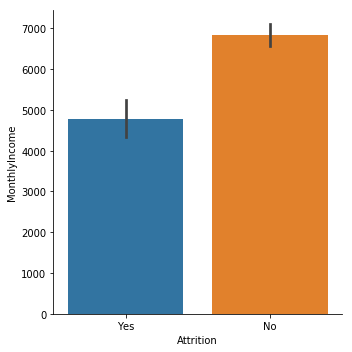

In [77]:
sns.factorplot(data=data,kind='bar',x='Attrition',y='MonthlyIncome')

we can see that the average income for 'No' class is higher and it is obvious as those earning well will certainly not be willing to exit the organisation. Similarly those employees who are probably not earning well will certainly want to change the company.

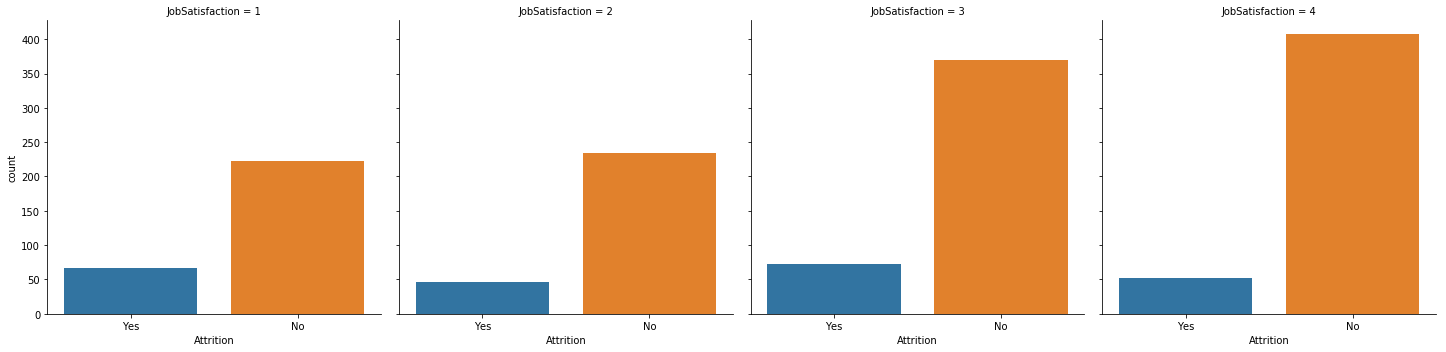

In [78]:
sns.factorplot(data=data,kind='count',x='Attrition',col='JobSatisfaction')

In [79]:
pd.crosstab(columns=data.Attrition,index=data.JobSatisfaction,margins=True,normalize='index')

Attrition,No,Yes
JobSatisfaction,,
1,0.771626,0.228374
2,0.835714,0.164286
3,0.834842,0.165158
4,0.886710,0.113290
All,0.838776,0.161224


we can see that for higher values of job satisfaction lesser percent of them say a 'Yes' which is quite obvious as highly contented workers will obvioulsy not like to leave the organisation.

In [80]:
pd.crosstab(columns=data.Attrition,index=data.EnvironmentSatisfaction,margins=True,normalize='index')

Attrition,No,Yes
EnvironmentSatisfaction,,
1,0.746479,0.253521
2,0.850174,0.149826
3,0.863135,0.136865
4,0.865471,0.134529
All,0.838776,0.161224


Again we can notice that the relative percent of 'No' in people with higher grade of environment satisfacftion.

In [81]:
pd.crosstab(columns=data.Attrition,index=data.RelationshipSatisfaction,margins=True,normalize='index')

Attrition,No,Yes
RelationshipSatisfaction,,
1,0.793478,0.206522
2,0.851485,0.148515
3,0.845316,0.154684
4,0.851852,0.148148
All,0.838776,0.161224


Again we notice a similar trend as people with better relationship satisfaction dont want to leave the organisation.

In [82]:
pd.crosstab(columns=data.Attrition,index=data.JobInvolvement,margins=True,normalize='index')

Attrition,No,Yes
JobInvolvement,,
1,0.662651,0.337349
2,0.810667,0.189333
3,0.855991,0.144009
4,0.909722,0.090278
All,0.838776,0.161224


Again we notice a similar trend as people with better job involvement dont want to leave the organisation.

In [83]:
pd.crosstab(columns=data.Attrition,index=data.WorkLifeBalance,margins=True,normalize='index')

Attrition,No,Yes
WorkLifeBalance,,
1,0.687500,0.312500
2,0.831395,0.168605
3,0.857783,0.142217
4,0.823529,0.176471
All,0.838776,0.161224


Again we notice a similar trend as people with better work life balance dont want to leave the organisation.

## Feature Selection

In [84]:
data.drop(['BusinessTravel','DailyRate','HourlyRate','MonthlyRate','NumCompaniesWorked', 'StockOptionLevel','TrainingTimesLastYear'],axis=1,inplace=True)

I decided to drop these feature because I think they are the least affected on attrition

## Feature Encoding

In [85]:
# encode all the categorical features.
def transform(feature):
    data[feature]=preprocessing.LabelEncoder().fit_transform(data[feature])
cat = data.select_dtypes(include='object')
for col in cat.columns:
    transform(col)

this fancation takes all the string objects and encoding them to number

In [86]:
data.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1,2,1,2,0,3,2,...,1,11,3,1,8,1,6,4,0,5
1,49,0,1,8,1,1,3,1,2,2,...,0,23,4,4,10,3,10,7,1,7
2,37,1,1,2,2,4,4,1,2,1,...,1,15,3,2,7,3,0,0,0,0
3,33,0,1,3,4,1,4,0,3,1,...,1,11,3,3,8,3,8,7,3,0
4,27,0,1,2,1,3,1,1,3,1,...,0,12,3,4,6,3,2,2,2,2


## Feature Scaling and Splitting the data into training and testing set

In [87]:
scaler=MinMaxScaler()
X=scaler.fit_transform(data.drop('Attrition',axis=1))
y=data['Attrition'].as_matrix()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

## Making predictions using KNN model

let's find the best parameters of k and weight:

In [88]:
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']
param_grid = dict(n_neighbors=k_range, weights=weight_options)
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring='accuracy', return_train_score=False)
grid.fit(X,y)
pd_results = pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
# just for not showing the table

### Finding the best knn model:

In [89]:
print(grid.best_score_)
print(grid.best_params_)

0.8489795918367347
{'n_neighbors': 6, 'weights': 'uniform'}


### Making the prediction:

In [90]:
knn = KNeighborsClassifier(n_neighbors=6, weights='uniform')
knn.fit(X, y)
test_predict = knn.predict(X_test)

### The prediction:

In [91]:
pred, counts = np.unique(test_predict, return_counts=True)
dict(zip(pred, counts))

{0: 479, 1: 7}

### The confusion matrix:

In [92]:
confusion = metrics.confusion_matrix(y_test, test_predict)
pd.DataFrame(confusion, columns=['predicted: 0','predicted: 1'], index=['true: 0','true: 1'])

,predicted: 0,predicted: 1
true: 0,414,2
true: 1,65,5


* True Positives (TP): 5
* True Negatives (TN): 414
* False Positives (FP): 2 ("Type I error")
* False Negatives (FN): 65 ("Type II error")

### The ROC:

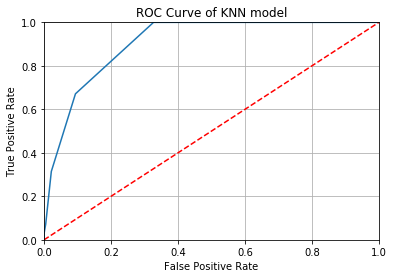

In [93]:
y_pred_prob = knn.predict_proba(X_test)
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_prob[:, 1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of KNN model')
plt.grid(True)

### The score of the model:

In [94]:
print(knn.score(X_test,y_test)*100,'% is the test accuracy')

86.21399176954732 % is the test accuracy


#### Cross-Validated Accuracy:

In [95]:
print(cross_val_score(knn,X,y,cv=10,scoring='roc_auc').mean()*100,'% is the cross validation score accuracy by "roc_auc"')
print(cross_val_score(knn,X,y,cv=10,scoring='accuracy').mean()*100,'% is the cross validation score accuracy by "accuracy"')

71.7155958638829 % is the cross validation score accuracy by "roc_auc"
84.90216523484627 % is the cross validation score accuracy by "accuracy"


## Making predictions using LogisticRegression model

let's find the best parameters of C and penalty:

In [96]:
penalty_option = ['l1', 'l2']
C = np.logspace(0, 4, num=10)
param_grid= dict(C=C, penalty=penalty_option)
grid = GridSearchCV(LogisticRegression(), param_grid, cv=10,scoring='accuracy', return_train_score=False)
grid.fit(X, y)
pd_results = pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

### Finding the best LogisticRegression model:

In [97]:
print(grid.best_score_)
print(grid.best_params_)

0.8653061224489796
{'C': 2.7825594022071245, 'penalty': 'l2'}


In [98]:
log_reg = LogisticRegression(C=2.7825594022071245,penalty='l2')
log_reg.fit(X_train,y_train)
test_predict = log_reg.predict(X_test)

### The prediction:

In [99]:
pred, counts = np.unique(test_predict, return_counts=True)
dict(zip(pred, counts))

{0: 462, 1: 24}

### confusion matrix:

In [100]:
confusion = metrics.confusion_matrix(y_test, test_predict)
pd.DataFrame(confusion, columns=['predicted: 0','predicted: 1'], index=['true: 0','true: 1'])

,predicted: 0,predicted: 1
true: 0,407,9
true: 1,55,15


Basic terminology:
* True Positives (TP): 15
* True Negatives (TN): 407
* False Positives (FP): 9 ("Type I error")
* False Negatives (FN): 55 ("Type II error")

### The ROC:

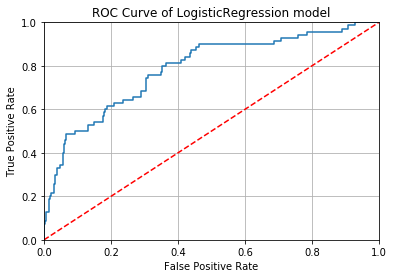

In [101]:
y_pred_prob = log_reg.predict_proba(X_test)
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_prob[:, 1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of LogisticRegression model')
plt.grid(True)

### The score of the model:

In [102]:
print(log_reg.score(X_test, y_test)*100,'% is the test accuracy')

86.83127572016461 % is the test accuracy


#### Cross-Validated Accuracy:

In [103]:
print(cross_val_score(log_reg,X,y,cv=10,scoring='roc_auc').mean()*100,'% is the cross validation score accuracy by "roc_auc"')
print(cross_val_score(log_reg,X,y,cv=10,scoring='accuracy').mean()*100,'% is the cross validation score accuracy by "accuracy"')

81.08181345663388 % is the cross validation score accuracy by "roc_auc"
86.53025334532185 % is the cross validation score accuracy by "accuracy"


## Making predictions using Decision Tree model

finding the best parameters of min_samples_split and max_depth:

In [ ]:
param_grid={'min_samples_split' : range(10,500,20),'max_depth': range(1,20,2)}
grid = GridSearchCV(tree.DecisionTreeClassifier(), param_grid, cv=10, scoring='accuracy', return_train_score=False)
grid.fit(X,y)
pd_results = pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
# just for not showing the table

### Finding the best DecisionTree model:

In [112]:
print(grid.best_score_)
print(grid.best_params_)

0.8476190476190476
{'max_depth': 5, 'min_samples_split': 70}


### Making the prediction:

In [113]:
dec = tree.DecisionTreeClassifier(min_samples_split=70,max_depth=5)
dec.fit(X_train,y_train)
test_predict = dec.predict(X_test)

### The prediction:

In [114]:
pred, counts = np.unique(test_predict, return_counts=True)
dict(zip(pred, counts))

{0: 468, 1: 18}

### confusion matrix:

In [125]:
confusion = metrics.confusion_matrix(y_test, test_predict)
pd.DataFrame(confusion, columns=['predicted: 0','predicted: 1'], index=['true: 0','true: 1'])

,predicted: 0,predicted: 1
true: 0,408,8
true: 1,60,10


* True Positives (TP): 10
* True Negatives (TN): 408
* False Positives (FP): 8 ("Type I error")
* False Negatives (FN): 60 ("Type II error")

### The ROC:

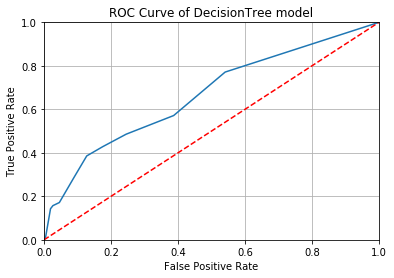

In [116]:
y_pred_prob = dec.predict_proba(X_test)
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_prob[:, 1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of DecisionTree model')
plt.grid(True)

### The score of the model:

In [117]:
print(dec.score(X_test,y_test)*100,'% is the test accuracy')

86.0082304526749 % is the test accuracy


#### Cross-Validated Accuracy:

In [118]:
print(cross_val_score(dec,X,y,cv=10,scoring='roc_auc').mean()*100,'% is the cross validation score accuracy by "roc_auc"')
print(cross_val_score(dec,X,y,cv=10,scoring='accuracy').mean()*100,'% is the cross validation score accuracy by "accuracy"')

68.93631970813045 % is the cross validation score accuracy by "roc_auc"
84.76565116976073 % is the cross validation score accuracy by "accuracy"


## Conclusion

In [138]:
scors= np.array([[71.7155958638829 ,81.08181345663388,68.93631970813045],
                 [84.90216523484627,86.53025334532185,84.76565116976073 ]])

In [140]:
pd.DataFrame(scors,columns=['k-NearestNeighbors','LogisticRegression','DecisionTree'], index=['roc_auc','accuracy'])

,k-NearestNeighbors,LogisticRegression,DecisionTree
roc_auc,71.715596,81.081813,68.936320
accuracy,84.902165,86.530253,84.765651


we can see that the LogisticRegression model is the best because it gets the highest scores.